In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

pd.set_option('max_column', 100)

In [2]:
raw_path = '../../dataset/raw/'
mst_path = '../../dataset/mst/'
fig_path = '../../export/01_summary_stats_ebike/'

In [3]:
os.listdir(mst_path)

['Participant_Survey.csv', 'question_lookup.csv']

In [4]:
#Function to replace spaces with underscores and removing \xa0
def clean_space(c):
    return c.lower().strip().replace(" ", "_")

In [5]:
#load in clean data
df = pd.read_csv(mst_path+"Participant_Survey.csv")
df.head()

,respondent_id,collector_id,start_date,end_date,ip_address,email_address,first_name,last_name,custom_data_1,"what_brand/type_of_e-bike_did_you_buy_(e.g.,_sonders_x)?",how_much_did_your_e-bike_cost_(before_the_rebate)?,"overall,_how_satisfied_are_you_with_your_e-bike?","why_do_you_like_or_dislike_your_e-bike?_what,_if_any,_other_thoughts_would_you_like_to_share_about_your_e-bike?",how_much_did_the_$700_rebate_influence_your_decision_to_purchase_an_e-bike?,how_far_is_your_average_trip_by_e-bike?,for_what_purpose_aremost_of_your_e-bike_rides?,business/work_use,injury_or_disability,sustainability_/_environmental_benefits,cargo_hauling,recreation_or_exercise,transport_children,save_money_/_reducetransportation_costs,hills,other_(please_specify),"social_media_(e.g.,_facebook,_instagram,_twitter)",news_article,bikesgv_listserve/email,friend/family/colleague,flyer,poster,other_(please_specify).1,how_familiar_were_you_with_e-bikes_before_hearing_about_this_rebate_program?,bicycle_(regular),electric_bicycle_(e-bike),working_motor_vehicle,scooter,motorcycle,none_of_the_above,walked,biked,skated_/_scooted,used_public_transit,carpooled_/_rode_as_a_passenger,used_ride_share_service_(lyft/uber),drove_car_/_motorcycle,walked.1,biked.1,skated_/_scooted.1,used_public_transit.1,carpooled_/_rode_as_a_passenger.1,used_ride_share_service_(lyft/uber).1,drove_car_/_motorcycle.1,how_oftendid_you_bicycle_for_any_purposebefore_purchasing_an_e-bike?,how_often_do_you_bicyclefor_any_purposesince_purchasing_an_e-bike?,do_you_use_your_e-bike_for_some_trips_that_you_used_to_take_by_car?,"have_youused_your_e-bikeon_a_river_path_or_‘greenway’_in_the_past_12_months?_(e.g.,_san_gabriel_river_or_rio_hondo_river_trails)",how_easy_or_difficult_is_it_to_bicycle_in_your_community?,did_your_level_of_comfort_riding_a_bicycle_in_traffic_increase_after_taking_the_city_cycling_class?,off-street_greenways_/_multi-use_paths,on-street_separated_/_physically_‘protected’_bikeways,buffered_bike_lanes,color_painted_bike_lanes,striped_bike_lanes,"bike_routes_(signage,_sharrows)",how_safe_doyou_feel_riding_a_bicycle_in_traffic?,"what_barriers_to_using_your_e-bike_have_you_encountered_thus_far,_if_any?",how_many_members_of_your_household_use_your_e-bike_at_least_once_a_month?,response,other_(please_specify).2,would_you_like_to_see_future_e-bike_rebate_programs?,should_future_programsexpand_the_list_of_eligible_light_electric_vehicles_to_include_electric-scooters_and_similar_micro-mobility_devices?,"other_suggestions,_feedback,_or_comments_forproject_organizers.",community_of_residence,zip_code,number_of_persons_in_household,household_income,what_is_your_age_group?,electric_car,electric_motorcycle,electric_scooter,electric_skateboard,electric_wheel,"no,_i_do_not_own_other_evs",other_(please_specify).3,american_indian_or_alaska_native,asian/pacific_islander,black_or_african_american,hispanic_or_latino,white,multi-ethnic,decline_to_state,other_(please_specify).4,female,male,decline_to_state.1,other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Open-Ended Response,Response,Response,Open-Ended Response,Response,Response,Response,Business/Work Use,Injury or Disability,Sustainability / Environmental Benefits,Cargo Hauling,Recreation or Exercise,Transport children,Save money / reduce transportation costs,Hills,Other (please specify),"Social Media (e.g., Facebook, Instagram, Twitter)",News article,BikeSGV listserve/email,Friend/family/colleague,Flyer,Poster,Other (please specify),Response,Bicycle (regular),Electric Bicycle (E-bike),Working motor vehicle,Scooter,Motorcycle,None of the above,Walked,Biked,Skated / Scooted,Used public transit,Carpooled / rode as a passenger,Used ride share service (Lyft/Uber),Drove car / motorcycle,Walked,Biked,Skated / Scooted,Used public transit,Carpooled / rode as a passenger,Used ride share service (Lyft/Uber),Drove car / motorcycle,Response,Response,Response,Response,Response,Response,Off-street greenways / multi-use paths,On-street separated / physically ‘protecte

In [53]:
#extract relevant collumn for transportation mode before and after
transport_mode = list(df.columns[39:53])
print(transport_mode)


['walked', 'biked', 'skated_/_scooted', 'used_public_transit', 'carpooled_/_rode_as_a_passenger', 'used_ride_share_service_(lyft/uber)', 'drove_car_/_motorcycle', 'walked.1', 'biked.1', 'skated_/_scooted.1', 'used_public_transit.1', 'carpooled_/_rode_as_a_passenger.1', 'used_ride_share_service_(lyft/uber).1', 'drove_car_/_motorcycle.1']


In [54]:
#take count of how many responses in each collumn
row_num = df[transport_mode[0]].size
count = []
for col in transport_mode:
    #in a new row of count, if the entry stored in df is not null, then add it to the count
    count.append(row_num - df[col].isnull().sum())
print(count)

[17, 19, 3, 11, 6, 5, 30, 12, 28, 3, 10, 4, 4, 27]


In [146]:
#calculate the percentage change of transport_mode from having ebike

#create new dataFrame/table
res = pd.DataFrame()
res = res.reset_index()

unique_transports = int(len(transport_mode) / 2)
transports = []
percent_change = []
for i in range(unique_transports):
    transports.append(transport_mode[i].replace('_/_', '/').replace('_',' '))
    percent_change.append(count[i+unique_transports]/count[i] - 1)

transports[5] = 'used ride share service'
res["mode_of_transport"] = transports
res["percentage_change"] = percent_change

print(res)

  index              mode_of_transport  percentage_change
0   NaN                         walked          -0.294118
1   NaN                          biked           0.473684
2   NaN                 skated/scooted           0.000000
3   NaN            used public transit          -0.090909
4   NaN  carpooled/rode as a passenger          -0.333333
5   NaN        used ride share service          -0.200000
6   NaN           drove car/motorcycle          -0.100000


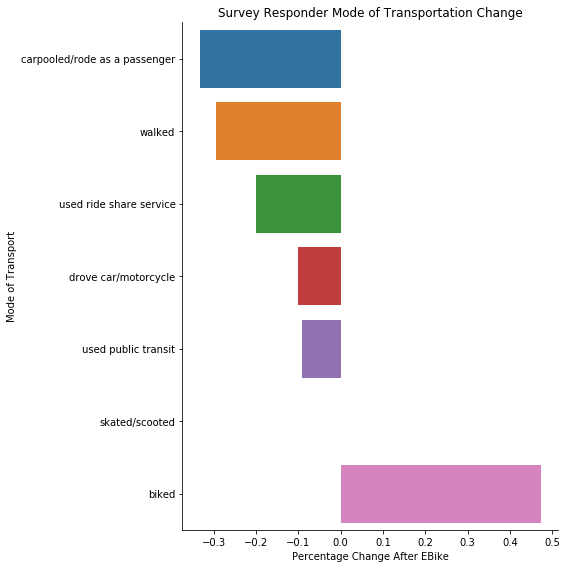

In [147]:
#Code got from David's previous semester project
temp = res.sort_values('percentage_change', ascending = True)[['mode_of_transport', 'percentage_change']]

g = sns.catplot(data = temp, y = 'mode_of_transport', x = 'percentage_change' ,orient = "h", kind = "bar", height = 8, legend=False)
g.despine()
plt.ylabel('Mode of Transport')
plt.xlabel('Percentage Change After EBike')
plt.title('Survey Responder Mode of Transportation Change')
plt.tight_layout()

plt.savefig(fig_path + 'surver_responder_mode_of_transportation_change', fmt = 'png', dpi = 300)
plt.show()

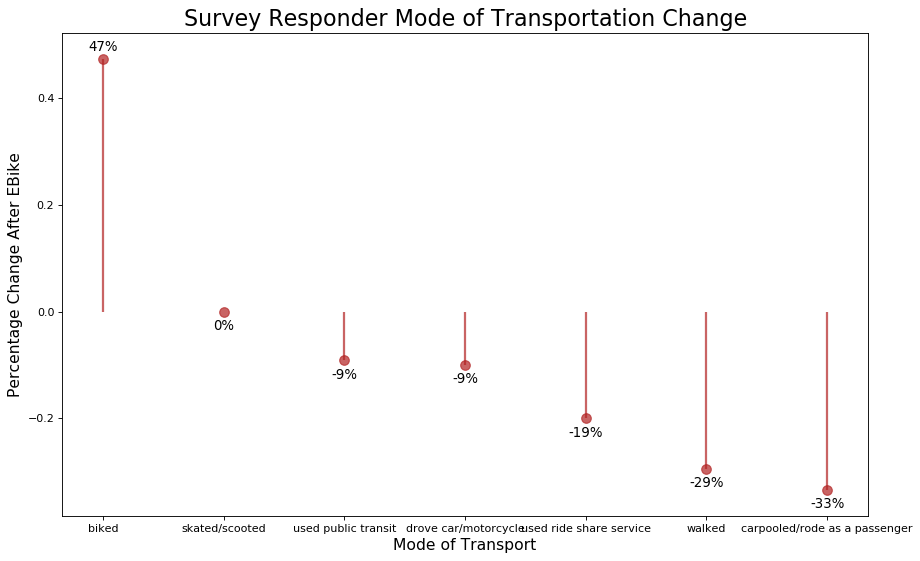

In [152]:
# Reorder it following the values:
temp = res.sort_values('percentage_change', ascending = False)
my_range=range(1,len(res.index)+1) 
 
# Vertical version.
fig, ax = plt.subplots(figsize=(13,8), dpi= 80)
ax.vlines(x=temp['mode_of_transport'], ymin=0, ymax=temp['percentage_change'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=temp['mode_of_transport'], y=temp['percentage_change'], s=75, color='firebrick', alpha=0.7)

plt.xlabel('Mode of Transport', fontsize = 14)
plt.ylabel('Percentage Change After EBike', fontsize = 14)
plt.title('Survey Responder Mode of Transportation Change', fontsize = 20)

for row in temp.iterrows():
    if (row[0] == 1):
        ax.text(row[1][1],row[1][2]+.01,s=str(int(row[1][2]*100)) + '%', horizontalalignment= 'center', verticalalignment='bottom', fontsize=12)
    else :
        ax.text(row[1][1],row[1][2]-.04,s=str(int(row[1][2]*100)) + '%', horizontalalignment= 'center', verticalalignment='bottom', fontsize=12)

plt.savefig(fig_path + 'surver_responder_mode_of_transportation_change_lollipop', fmt = 'png', dpi = 300)
plt.show()

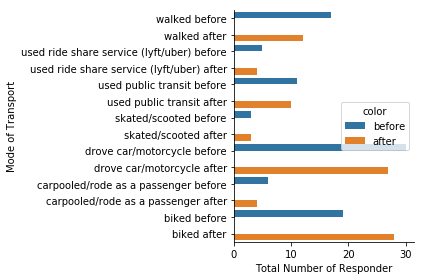

In [35]:
#Code got from David's previous semester project
temp = res.sort_values('mode_of_transport', ascending = False)[['mode_of_transport', 'total_count', 'color']]


sns.barplot(data = temp, y = 'mode_of_transport', x = 'total_count', hue = 'color', orient = "h")
sns.despine()
plt.ylabel('Mode of Transport')
plt.xlabel('Total Number of Responder')
plt.tight_layout()

plt.savefig(fig_path + 'surver_responder_mode_of_transportation', fmt = 'png', dpi = 300)
plt.show()

In [22]:
#add before and after to the collumn names in transport_mode

#create new dataFrame/table
res = pd.DataFrame()
res = res.reset_index()

new_transport_mode = []
color = []
for i in range(len(transport_mode)):
    col_name = transport_mode[i].replace('_/_', '/').replace('_',' ')
    if (col_name.count(".1") == 0):
        new_transport_mode.append(col_name + " before")
        color.append("before")
    else:
        new_transport_mode.append(col_name[:len(col_name) - 2] + " after")
        color.append("after")


res['mode_of_transport'] = new_transport_mode
res['total_count'] = count
res['color'] = color

print(res)

   index                           mode_of_transport  total_count   color
0    NaN                               walked before           17  before
1    NaN                                biked before           19  before
2    NaN                       skated/scooted before            3  before
3    NaN                  used public transit before           11  before
4    NaN        carpooled/rode as a passenger before            6  before
5    NaN  used ride share service (lyft/uber) before            5  before
6    NaN                 drove car/motorcycle before           30  before
7    NaN                                walked after           12   after
8    NaN                                 biked after           28   after
9    NaN                        skated/scooted after            3   after
10   NaN                   used public transit after           10   after
11   NaN         carpooled/rode as a passenger after            4   after
12   NaN   used ride share service (ly

In [ ]:
#Collect level of bike usage
bike_before = pd.DataFrame().reset_index()

bike_after = pd.DataFrame().reset_index()
bike_after = bike_before[:]

bike_after.head()

In [ ]:
#Count the frequencies
biking_freq = list()
freq_count = list()
for i in range(1,row_num):
    frequency = df['how_oftendid_you_bicycle_for_any_purposebefore_purchasing_an_e-bike?'][i]
    print(frequency)
    if frequency in biking_freq:
        index = biking_freq.index(frequency)
        freq_count[index] += 1
    else:
        biking_freq.append(frequency)
        freq_count.append(1)
        
bike_before['Biking_Frequency'] = biking_freq
bike_before['Frequency_Count'] = freq_count
        
bike_before.head()

In [ ]:
print(bike_before)

In [ ]:
# Plot
temp = bike_before.sort_values('Biking_Frequency', ascending = True)[['Biking_Frequency', 'Frequency_Count']]
print(temp)



In [ ]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orchid']
plt.pie(temp['Frequency_Count'], labels=temp['Biking_Frequency'], colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Survey Responder Biking Frequency Before Ebike')
plt.axis('scaled')

plt.savefig(fig_path + 'surver_responder_biking_frequency_before_ebike', fmt = 'png', dpi = 300)
plt.show()

In [ ]:
#Count the frequencies
biking_freq = list()
freq_count = list()
for i in range(1,row_num):
    frequency = df.loc[i,'how_often_do_you_bicyclefor_any_purposesince_purchasing_an_e-bike?']
    if frequency in biking_freq:
        index = biking_freq.index(frequency)
        freq_count[index] += 1
    else:
        biking_freq.append(frequency)
        freq_count.append(1)
        
bike_after.loc[:,'Biking_Frequency'] = biking_freq
bike_after.loc[:,'Frequency_Count'] = freq_count
        
bike_after.head()

In [ ]:
# Plot
temp = bike_after.sort_values('Biking_Frequency', ascending = True)[['Biking_Frequency', 'Frequency_Count']]

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orchid']
plt.pie(temp['Frequency_Count'], labels=temp['Biking_Frequency'], colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Survey Responder Biking Frequency Since Ebike')

plt.axis('scaled')
plt.savefig(fig_path + 'surver_responder_biking_frequency_since_ebike', fmt = 'png', dpi = 300)
plt.show()

In [ ]:
# Go collect whether a person chose something; maybe by assigning each choice a number from 1-5
# Then Go compare what number changed from before ebike to after; Identify which number goes to which
# Collect that list of changes into another list, maybe from 11 -> 55 or 2d list, people who ended up chosing choice x
# then that contains a list of the originating mode of transportation
# all this time include with each line is an index of how safe people felt
# extension involve including the specific type of bike lane available and then do a correlation map

In [ ]:
#load in clean data
df = pd.read_csv(mst_path+"Participant_Survey.csv")
df.head()

In [ ]:
#extract relevant collumn for transportation mode before and after
transport_mode = list(df.columns[39:53])
print(transport_mode)


In [ ]:
temp = pd.DataFrame().reset_index()
for mode in transport_mode:
    temp[mode] = df[mode]
    
temp.head

In [ ]:
#record changes in usage
number_transport = len(transport_mode)
losses = list()
gains = list()
for row_i in len(DataFrame.index):
    row = temp.iloc(1,)
    loss = list()
    gain = list()
    for i in range(0, (int)( number_transport/2)):
        if (row[i].isnull()):
            #gained transport
            if (not row[i+number_transport]):
                
        
        